# Error Analysis

### Submitted by : Anushka and Yashasvee

### Answer 1 : Hamiltonian and EOM'S

The artificial Hamiltonian for this 1-D integral comes out to be as follows:

Using:
 $P[\phi] = \frac{e^{-S[\phi]}}{Z}$

Comparing the one given in the sheet, we get:

 $e^{{-S[\phi]}} = \frac{1}{Z}\frac{e^{\phi^2}}{2+\phi^2}$

Taking log both sides:

 $-S[\phi] = \log(e^{-\phi^2}) - \log({2+\phi^2})$

 $ S[\phi] = \phi^2 + \log(2+\phi^2) $

The general Hamiltonian is:

$H[p,\phi] = \frac{1}{2} \sum{p^2_i} + S[\phi]$

#### $H[p,\phi] = \frac{1}{2} \sum{p^2_i}+\phi^2 + \log(2+\phi^2)$

The equations of motion are:

(Taking $p_i$ as $p$ because this is a 1 D integral)

#### $ \dot{\phi} = \frac{\partial{H}}{\partial{p}} = p $
#### $\dot{p} = - \frac{\partial{H}}{\partial{\phi}} = -2 \phi - \frac{2\phi}{2+\phi^2}$



### Answer 2 : Leapfrog algorithm

In [13]:
%matplotlib inline

import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.special as sp
from scipy.integrate import quad


In [14]:
#  Trying integration for the given integrals via scipy for a random value of phi = 100

Z = 0.746858

def prob_dist(phi):
    return np.exp(-phi**2)*(1/Z)/(2 + phi**2)
phi = 100
# Defining the integral
def integrand(phi):
    return np.cos(np.sqrt(1+phi**2))*prob_dist(phi)
# phi = np.linspace(1,100,1000)

I  = quad(integrand,-np.inf, np.inf)#, args=(phi))
print(I[0])

0.3987449301151221


In [15]:
def integrand_error(phi):
    return (np.cos(np.sqrt(1+phi**2))-0.398745)**2*prob_dist(phi)
phi = 100
I_sigma  = quad(integrand_error,-np.inf, np.inf)#, args=(phi))
# print(I_sigma)
print(I_sigma[0])

#  Get similar values as the sheet

0.03498159175754428


In [16]:
p = np.random.normal(0,1)
phi = 1
N_md = 3
N = 20
t = 10**6  # trajectories

In [17]:
def hamiltonian(p,phi):
    return (p**2)/2 + phi**2 + np.log(2+phi**2) 

def phidot(p):
    return p

def pdot(phi):
    return (-2*phi - 2*phi/(2+phi**2))


In [18]:

def leapfrog(N_md, p, phi, N):
    eps=0.1/N_md
    P = p
    Phi = phi
    Phi=Phi+eps*0.5*phidot(p)
    for i in range(N_md):
        P=P+eps*pdot(Phi)
        Phi= Phi + eps*phidot(P)
        
    P=P+0.5*eps*pdot(Phi)    
    Phi=Phi-0.5*eps*phidot(P)
    
    return P,Phi
     

In [19]:
diff = []
range_1 = range(1,40)
phi=100
for N_md in range_1:
    p=np.random.rand()
    # print(p, phi)
    arr = leapfrog(N_md, p, phi, N)
    p_f = arr[0]          # We need final values of p_f and phi_f to calculate H_f
    phi_f = arr[1]
    H_f = hamiltonian(p_f,phi_f)
    H_0 = hamiltonian(p,phi)
    # print(H_f, H_0)
    # print(p_f, phi_f, H_f, H_0)
    # print(N_md)
#     The following is the quantity we want on y-axis
    diff.append(abs((H_f-H_0)/H_0)) 

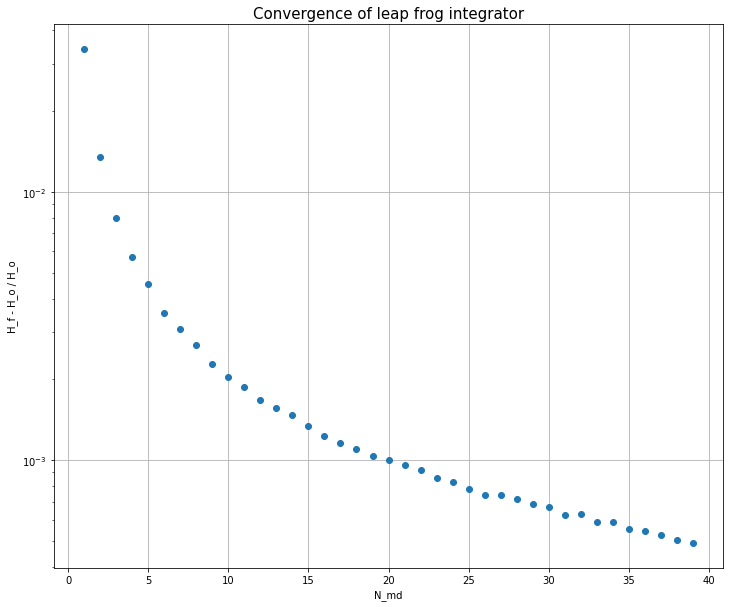

In [20]:
plt.figure(figsize=(12,10))
plt.yscale('log')
plt.grid()
plt.xlabel("N_md")
plt.ylabel("H_f - H_o / H_o")
# print(diff)
plt.title("Convergence of leap frog integrator", fontsize =15)
plt.plot(range_1, diff,'o')

In [21]:
# Now we code the HMC algorithm

# Size of ensemble is given as N_cfg

def markov_chain(phi_i,N_cfg,N_md,N):
    chain = []
    chain.append(phi_i)
    for i in range(N_cfg):
        p = np.random.normal(0,1)  # Random sample
        new = leapfrog(N_md, p, chain[-1], N) # Integrating leapfrog algorithm
        prob = np.exp(hamiltonian(p,chain[-1])-hamiltonian(new[0], new[1]))
#  Given probability distribution function defined above
        if prob > np.random.uniform(0,1):   # Accept/reject
            chain.append(new[1])  
        else:                           
            chain.append(chain[-1]) 
    print(chain)
    return chain



In [22]:
#  Now we need to define observables, phi , that will be similar to the one done in Homework 2

def variables(phi_i, N_cfg, N_md, N, obs):
    chain = markov_chain(phi_i,N_cfg,N_md,N)
#     From Part 1 we have the equations foe <m> and E so we use them here:
    exp_val = 0.0
    for i in range(len(chain)):
        exp_val = exp_val + np.cos(np.sqrt(1+chain[i]**2))
     
    if obs == "exp_val":
        var = exp_val
        
    return var





### Answer 2 : Auto correlation function $\Gamma (t)$

In [23]:
N_cfg = 2000

In [24]:
gamma_zero = 1
# gamma_t

In [25]:
# Given auto correlation function

def exp_func(t,tau_int):
    return np.exp(-t/tau_int)

### Answer 3 : Binning and Auto-correlation

In [26]:
def binning(random,b):
    I_value=np.array([])
    for i in range (0,len(random),b):
        I_value=0
        for j in range(b):
            I_value+=random[i+j]
        I_value=I_value/b  
        I_value.append(I_value)
    return(I_value)
        

### Answer 4 : Bootstrap Routine

In [29]:
# Bootstrap error

 
random = variables(phi_new,N_cfg,N_md,N, exp_val)


N_bs = 200      # Given 

# random data points = phi points/exp_val

# we append 0(phi) in the bootstrap loop

def bootstrap(random,N_bs):
    mean = np.array([])
    for j in range(N_bs):
        new_var = np.array([])
        for i in range(len(random)):  
            new_var.append(np.random.choice(random))
        mean.append(np.mean(new_var))

    new_mean = np.mean(mean)
    new_std = np.std(mean)

    return new_std